In [106]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
data = pd.read_csv(r'../procesamiento_datos/data_dev.csv')	

In [108]:
precios = data['Precio']
features = data.drop(['Precio'], axis=1)

## Análisis de la distribucion de la variable objetivo: Precio 

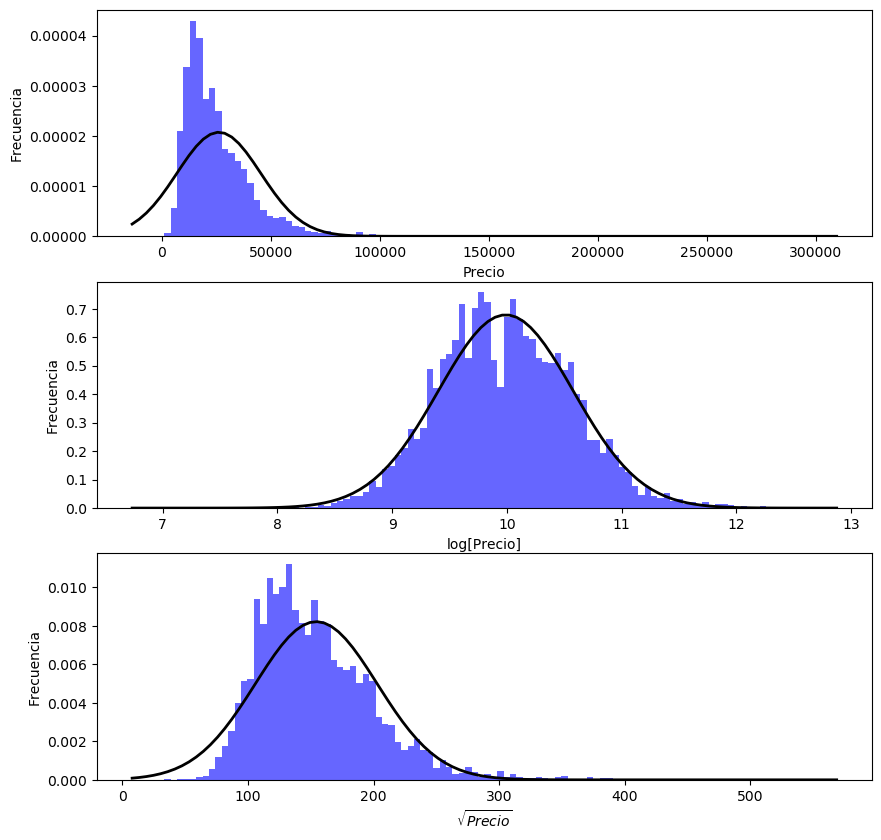

In [109]:
from plots import plot_histogram
plot_histogram(precios)


Notamos que al aplicarle una transformación logaritmica a los precios, estos siguen una distribución normal. 

## Correlacion de variable objetivo con features numericos

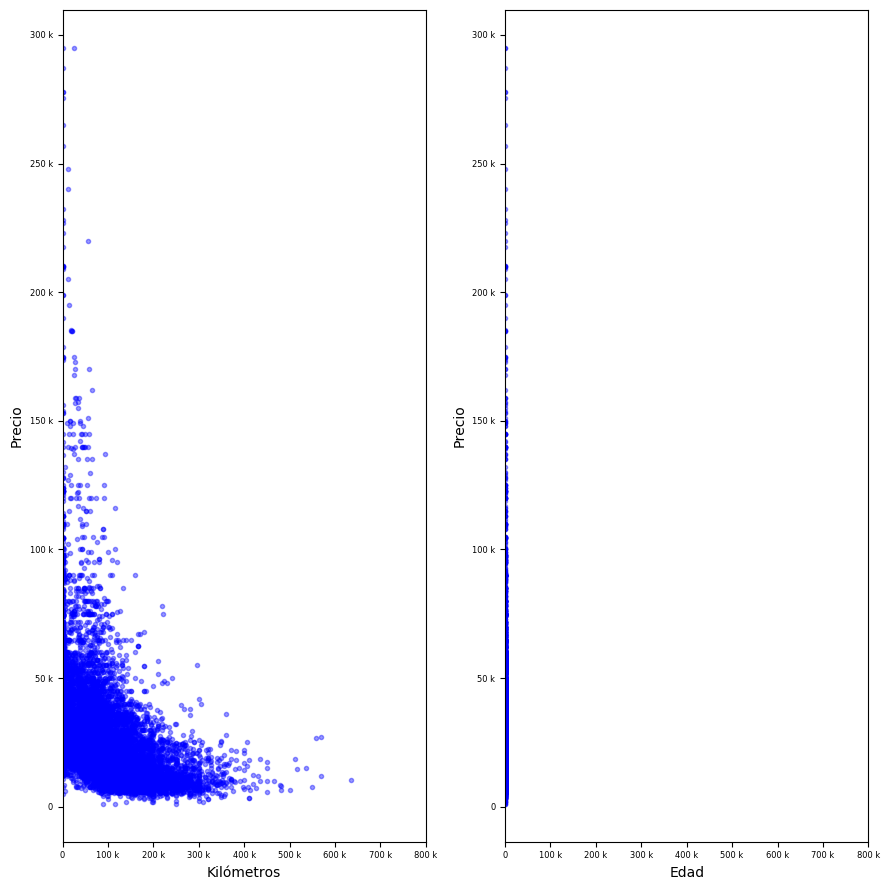

In [110]:
from plots import plot_correlaciones
features_numericas = features['Kilómetros'].astype(float)
features_numericas = pd.concat([features_numericas, features['Edad']], axis=1)
plot_correlaciones(precios, features_numericas)

Se observa que a medida que la edad y los kilómetros aumentan, el precio de los autos tiene una clara tendencia a disminuir.

## Casos particulares

(1708, 2)
(1708, 2)
(1708, 1)
(1708, 1)


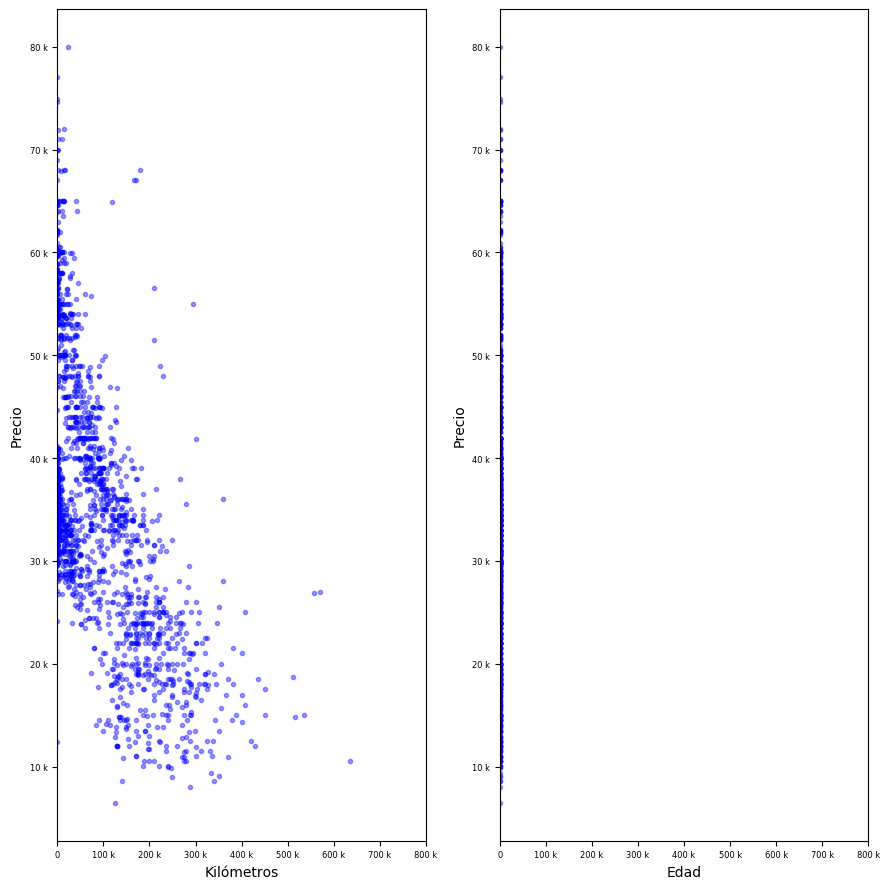

In [111]:
features_toyo = features[features['Marca'] == 'toyota']
precios_toyo = precios[features_toyo.index]

features_numericas_toyo = features_toyo['Kilómetros'].astype(float)
features_numericas_toyo = pd.concat([features_numericas_toyo, features_toyo['Edad']], axis=1)

features_numericas_toyo = pd.DataFrame(features_numericas_toyo)

print(features_numericas_toyo.shape)
features_numericas_toyo = features_numericas_toyo.reset_index(drop=True)
print(features_numericas_toyo.shape)


precios_toyo = pd.DataFrame(precios_toyo)
print(precios_toyo.shape)
precios_toyo = precios_toyo.reset_index(drop=True)
print(precios_toyo.shape)


plot_correlaciones(precios_toyo, features_numericas_toyo)

## Modelo especifico

(867, 2)
(867, 2)
(867, 1)
(867, 1)


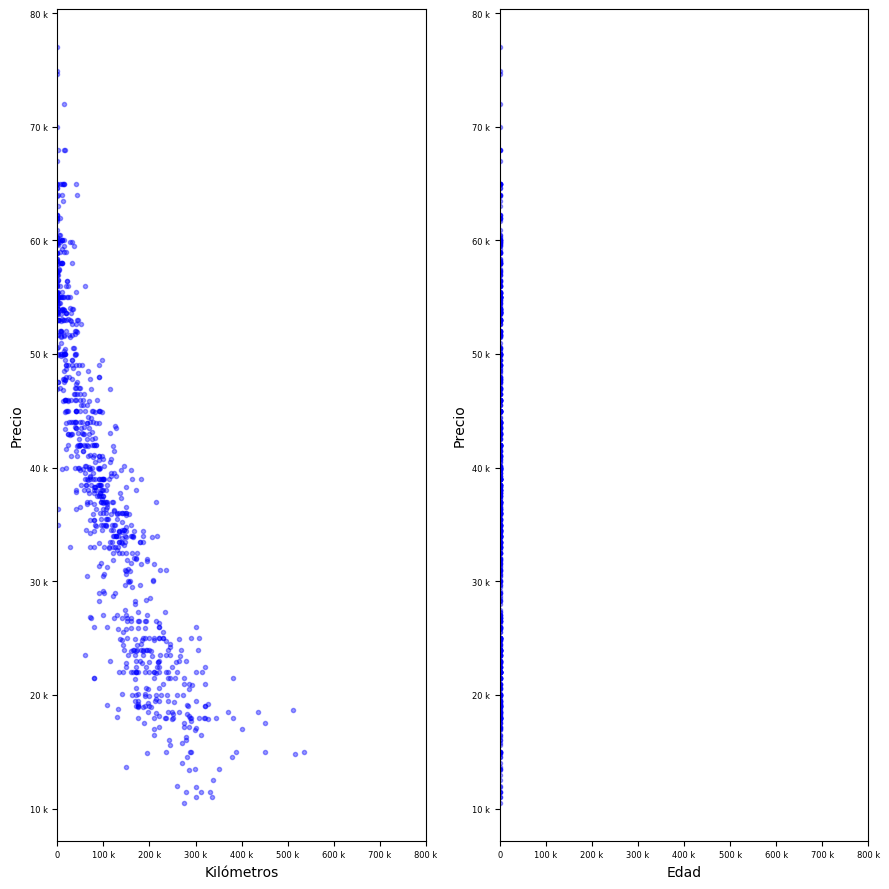

In [112]:
features_sw4= features[features['Modelo'] == 'sw4']
precios_sw4 = precios[features_sw4.index]

features_numericas_sw4 = features_sw4['Kilómetros'].astype(float)
features_numericas_sw4 = pd.concat([features_numericas_sw4, features_sw4['Edad']], axis=1)

features_numericas_sw4 = pd.DataFrame(features_numericas_sw4)

print(features_numericas_sw4.shape)
features_numericas_sw4 = features_numericas_sw4.reset_index(drop=True)
print(features_numericas_sw4.shape)


precios_sw4 = pd.DataFrame(precios_sw4)
print(precios_sw4.shape)
precios_sw4 = precios_sw4.reset_index(drop=True)
print(precios_sw4.shape)


plot_correlaciones(precios_sw4, features_numericas_sw4)

data_sw4 = pd.concat([features_sw4, precios_sw4], axis=1)

Agregamos el resto de los features:

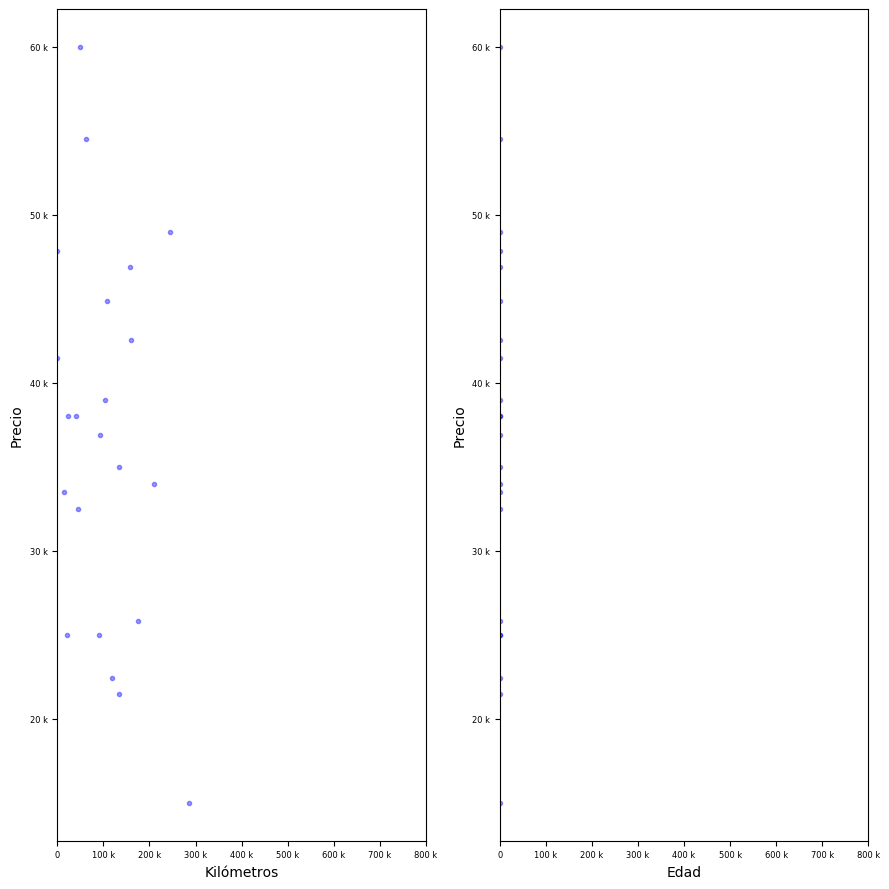

In [113]:

data_sw4_specific = data_sw4[(data_sw4['Transmisión'] == 'automatica') ]
data_sw4_specific = data_sw4_specific.reset_index(drop=True)

data_sw4_specific = pd.DataFrame(data_sw4_specific)
features_sw4_sp = data_sw4_specific.drop(['Precio'], axis=1)
precios_sw4 = data_sw4_specific['Precio']

features_numericas_sw4_sp = features_sw4_sp['Kilómetros'].astype(float)
features_numericas_sw4_sp = pd.concat([features_numericas_sw4_sp, features_sw4_sp['Edad']], axis=1)

features_numericas_sw4_sp = pd.DataFrame(features_numericas_sw4_sp)

features_numericas_sw4_sp = features_numericas_sw4_sp.reset_index(drop=True)


features_numericas_sw4_sp = pd.DataFrame(features_numericas_sw4_sp)

precios_sw4 = precios_sw4.reset_index(drop=True)


plot_correlaciones(precios_sw4, features_numericas_sw4_sp)

    


## Cobertura que tenemos para cada gama de autos

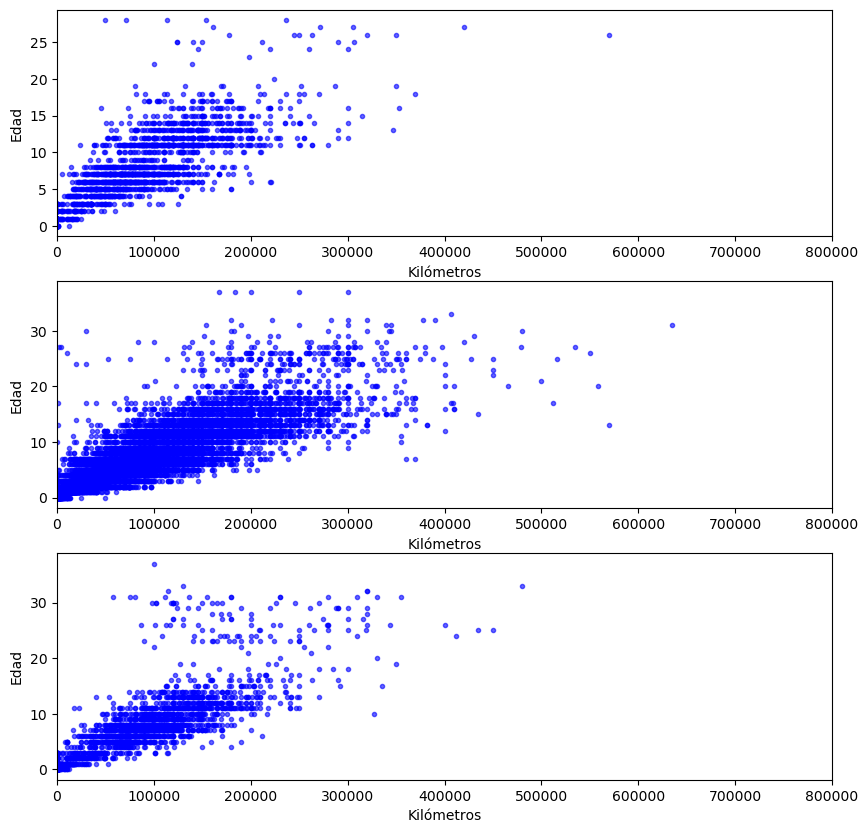

In [114]:
from plots import plot_cobertura
plot_cobertura(features[features['Gama']=='Lujo'], features[features['Gama']=='Media'], features[features['Gama']=='Baja']  )
